## [Student ID: 2207938]

Importatation/Installation of Libraries

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os
import joblib
from sklearn.tree import DecisionTreeClassifier

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Placing my student ID as a variable to be used as a seed

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
student_id = 2207938
seed = student_id

# Data Reading

In [8]:
# Mounting  of Google Drive to read saved files
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [9]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(2207938))
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

List files:  ['test.csv', 'valid.csv', 'train.csv', 'trainfiles', 'models']


In [10]:
#identifying the path and reading the train file
train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)
train_df= pd.read_csv(train_file)
train_df.info()
train_df

Train file:  gdrive/MyDrive/./CE807/Assignment2/2207938/train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12313 entries, 0 to 12312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.7+ KB


,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF
...,...,...,...
12308,92805,And Soros money in their pocket. #maga🇺🇸🇺🇸🇺🇸🇺🇸...,NOT
12309,35989,@USER ur a fucking dumbass fr. there’s no way ...,OFF
12310,30188,.@USER They both want you to believe in yourse...,NOT
12311,96815,@USER It's like a reading a leaflet from Antif...,OFF


In [11]:
#identifying the path and reading the test file
test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)
test_df= pd.read_csv(test_file)
test_df.info()
test_df

Test file:  gdrive/MyDrive/./CE807/Assignment2/2207938/test.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      860 non-null    int64 
 1   tweet   860 non-null    object
 2   label   860 non-null    object
dtypes: int64(1), object(2)
memory usage: 20.3+ KB


,id,tweet,label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF
...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT


In [12]:
#identifying the path and reading the validation file
validation_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('validation file: ', validation_file)
valid_df= pd.read_csv(validation_file)
valid_df.info()
valid_df

validation file:  gdrive/MyDrive/./CE807/Assignment2/2207938/valid.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      927 non-null    int64 
 1   tweet   927 non-null    object
 2   label   927 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.9+ KB


,id,tweet,label
0,12476,@USER @USER @USER Trump is declassifying infor...,NOT
1,23242,@USER Ha even with them trying to rig the syst...,NOT
2,97885,@USER @USER @USER Man you really thought this ...,NOT
3,43414,@USER Ms. Clinton - you are a class act. My re...,OFF
4,81403,@USER It’s still here at 753. If someone did t...,NOT
...,...,...,...
922,22519,@USER @USER She is as dumb as she looks,OFF
923,58715,@USER If you cant give me stitches when I get ...,NOT
924,46544,@USER need more ladies to spread out their pus...,OFF
925,70368,@USER I cant believe he didnt work in comet pi...,OFF


# Data Cleaning/ Preprocessing

In [13]:
#defining a function that'll be used to preprocess the files

def preprocess_text_data(df, text_column):

    #making sure all tweet column content are of data type string
    df[text_column] = df[text_column].astype(str) 

    # Lowercase all text
    df[text_column] = df[text_column].str.lower()   
   
    # Removing common non-sensical text
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'(\\n)+', ' ', x))

    # Removing non-alphabetic characters
    df[text_column] = df[text_column].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

    # Removing numerical values
    df[text_column] = df[text_column].apply(lambda x: re.sub('[0-9]+', '', x))

    # Removing digits
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'\d', '', x))

    # Removing URLs
    df[text_column] = df[text_column].apply(lambda x: re.sub(r'http\S+', '', x))

    # Removing punctuations
    df[text_column] = df[text_column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    # Tokenize text
    df[text_column] = df[text_column].apply(lambda x: nltk.word_tokenize(x))

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    df[text_column] = df[text_column].apply(lambda x: [word for word in x if not word in stop_words])

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    df[text_column] = df[text_column].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    # Joinning words back into strings
    df[text_column] = df[text_column].apply(lambda x: ' '.join(x))

    return df

In [14]:
#passing the preprosessing function into the train data, test data and validation data
Train = preprocess_text_data(train_df, 'tweet')
Test = preprocess_text_data(test_df, 'tweet')
Valid = preprocess_text_data(valid_df, 'tweet')

In [15]:
print(Train)
# saving the dataframe to a csv file
Train.to_csv('PreprocessedTrain.csv', index=False)


          id                                              tweet label
0      42884  user done well intentional th hour attack comp...   NOT
1      92152       k follower k go get goal trumptrain maga kag   NOT
2      65475         user tom bought interested tom constituent   NOT
3      22144           user user even brother think monster url   OFF
4      81048  user user user user user understand someone kn...   OFF
...      ...                                                ...   ...
12308  92805                        soros money pocket maga url   NOT
12309  35989         user ur fucking dumbass fr way anyone else   OFF
12310  30188  user want believe research discover truth want...   NOT
12311  96815  user like reading leaflet antifa blm utter gar...   OFF
12312  10460  user strictest gun control law country saying ...   OFF

[12313 rows x 3 columns]


In [16]:
print(Test)
# saving the dataframe to a csv file
Test.to_csv('PreprocessedTest.csv', index=False)

        id                                              tweet label
0    15923  whoisq wherestheserver dumpnike declasfisa dem...   OFF
1    27014  constitutionday revered conservative hated pro...   NOT
2    30530  foxnews nra maga potus trump ndamendment rnc u...   NOT
3    13876  watching boomer getting news still parole alwa...   NOT
4    60133  nopasaran unity demo oppose far right london a...   OFF
..     ...                                                ...   ...
855  73439  despicabledems lie rifle dem distorted law pus...   OFF
856  25657  meetthespeakers user present event oiw finpact...   NOT
857  67018  people unfollowed talking merlin sorry im stil...   OFF
858  50665  wednesdaywisdom antifa call right fascist real...   NOT
859  24583             kavanaugh typical liberal democrat url   NOT

[860 rows x 3 columns]


In [17]:
print(Valid)
# saving the dataframe to a csv file
Valid.to_csv('PreprocessedValid.csv', index=False)

        id                                              tweet label
0    12476  user user user trump declassifying information...   NOT
1    23242  user ha even trying rig system idea divine int...   NOT
2    97885          user user user man really thought huh url   NOT
3    43414  user m clinton class act response idiot would ...   OFF
4    81403   user still someone family enraged user let loose   NOT
..     ...                                                ...   ...
922  22519                                user user dumb look   OFF
923  58715  user cant give stitch get cut doctor dont give...   NOT
924  46544                    user need lady spread pussy cam   OFF
925  70368  user cant believe didnt work comet pizza alex ...   OFF
926  87090                                          user jail   NOT

[927 rows x 3 columns]


# Statistical Analysis

---



In [18]:
#Analysis of the words found in the data with high frequencies
def top_words(column_data):
    # Creating a CountVectorizer object
    vectorizer = CountVectorizer()

    # Fitting and transforming the column data
    X = vectorizer.fit_transform(column_data)

    # Get the words and their frequencies
    word_freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

    # Sorting the word frequencies in descending order
    sorted_word_freqs = sorted(word_freqs, key=lambda x: -x[1])

    # Gettimg the top 20 words and their frequencies
    top_word_freqs = sorted_word_freqs[:20]
    top_words = [word[0] for word in top_word_freqs]
    top_freqs = [word[1] for word in top_word_freqs]

     # putting it into a dataframe for clarity
    top_words_df = pd.DataFrame(top_word_freqs, columns=['Word', 'Frequency'])
    top_words_df

    #Creating a wordcloud of the top 20 words in the entire column
    wc = WordCloud(background_color="white", width=800, height=400)
    wc.generate_from_frequencies(dict(top_word_freqs))

    # Plotting the wordcloud
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud of Top 20 words in Tweet")
    plt.show()
    
    # Returning the top 20 words and their frequencies
    return top_words_df
    

In [19]:
#Analysis of unique words i.e distinct words used in the  dataset
def vocabulary_counts(df, text_column):
    # Get the word count for each text
    word_counts = df[text_column].str.split().apply(len)

    # Get the total number of unique words
    unique_words = set(df[text_column].str.cat(sep=' ').split())
    num_unique_words = len(unique_words)

    # Getting the top 20 unique words and their frequency
    top_word_freqs = df[text_column].str.split().explode().value_counts().nlargest(20)
    top_words = top_word_freqs.index.tolist()
    top_freqs = top_word_freqs.values.tolist()

    # Plot a bar chart of the top 20 unique words and their frequency
    fig, ax2 = plt.subplots(figsize=(10, 10))
    ax2.bar(top_words, top_freqs, color='blue')
    ax2.set_xlabel('Unique Words')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Top 20 Unique Words and their Frequency\nNumber of Unique Words: {num_unique_words}')
    ax2.set_xticklabels(top_words, rotation=90)
    plt.show()

In [71]:
#Analysis of the length of the label column
def compute_label(dataset):
    
    # Count the number of 'OFF' and 'NOT' values in the 'label' column
    off_count = (dataset['label'] == 'OFF').sum()
    not_count = (dataset['label'] == 'NOT').sum()
    
    print(f"Number of 'OFF' tweets: {off_count}")
    print(f"Number of 'NOT' tweets: {not_count}")

    # Create a histogram
    labels = ['OFF', 'NOT']
    counts = [off_count, not_count]
    plt.bar(labels, counts)
    plt.title('Label distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
    

In [20]:
#Analysis of the length distribution of words found in every tweet
def text_length_distribution(df, text_column):
    text_lengths = df[text_column].str.len()
    
    fig,ax1 = plt.subplots(ncols=1, figsize=(15, 5))
    
    # Histogram of text length distribution
    sns.histplot(data=text_lengths, bins=30, ax=ax1)
    ax1.set_title('Text Length Distribution')
    ax1.set_xlabel('Length of tweet (in words)')
    ax1.set_ylabel('Frequency')
    
    return text_lengths

In [21]:
#For better statistical Analysis of the OLID Dataset, the three sets will be merged together to print out accurate results
merged = pd.concat([Train, Test, Valid])
# Shuffle the merged dataframe with a random state of 2207938
merged.sample(frac=1, random_state=2207938)
merged.info()
merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14100 entries, 0 to 926
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      14100 non-null  int64 
 1   tweet   14100 non-null  object
 2   label   14100 non-null  object
dtypes: int64(1), object(2)
memory usage: 440.6+ KB


,id,tweet,label
0,42884,user done well intentional th hour attack comp...,NOT
1,92152,k follower k go get goal trumptrain maga kag,NOT
2,65475,user tom bought interested tom constituent,NOT
3,22144,user user even brother think monster url,OFF
4,81048,user user user user user understand someone kn...,OFF
...,...,...,...
922,22519,user user dumb look,OFF
923,58715,user cant give stitch get cut doctor dont give...,NOT
924,46544,user need lady spread pussy cam,OFF
925,70368,user cant believe didnt work comet pizza alex ...,OFF


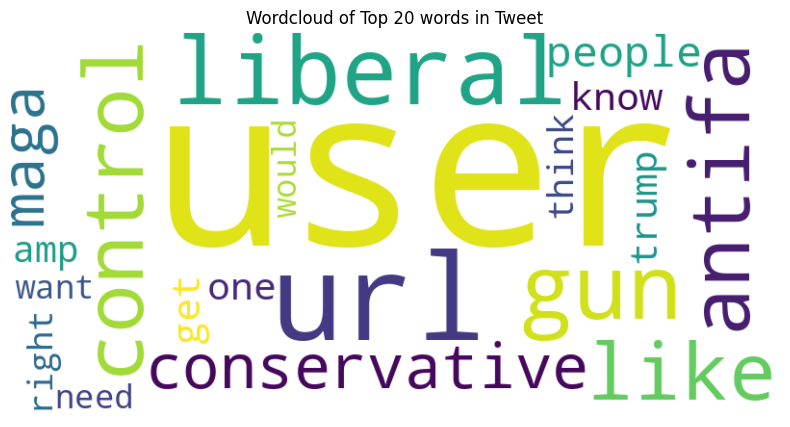

,Word,Frequency
0,user,34027
1,url,2608
2,liberal,1748
3,gun,1616
4,control,1300
5,antifa,1288
6,like,1203
7,conservative,1171
8,maga,1112
9,people,981


In [22]:
top_words(merged['tweet'])

<ipython-input-19-3e23fcd57002>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(top_words, rotation=90)


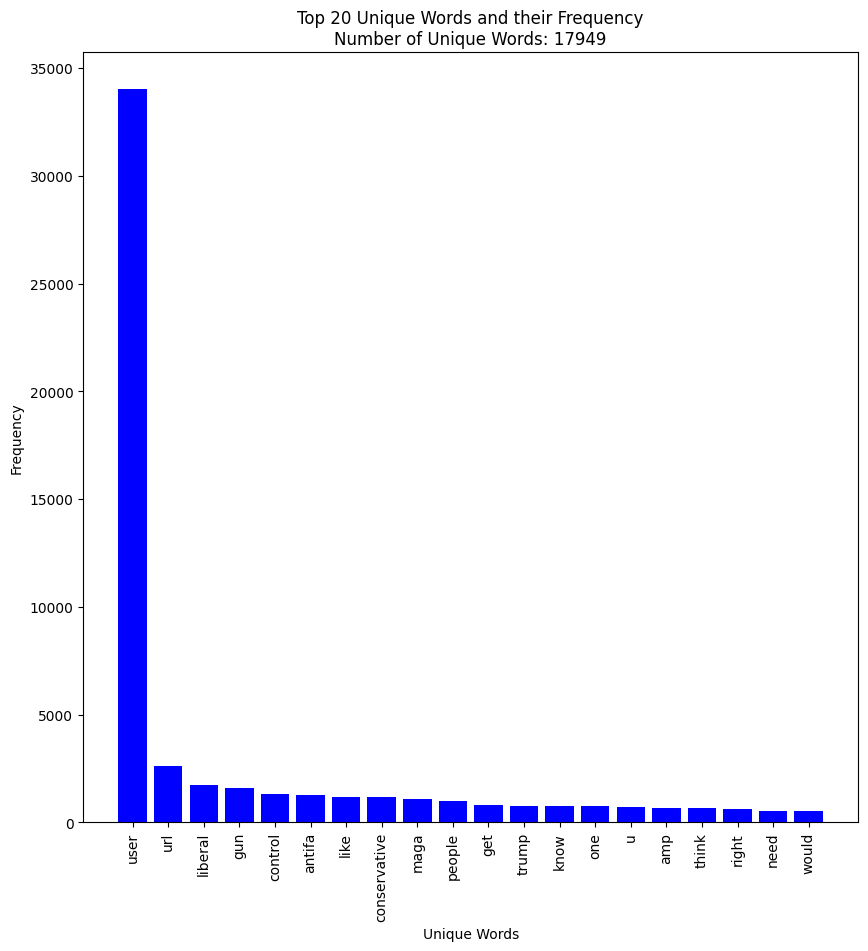

In [23]:
vocabulary_counts(merged, 'tweet')

0      150
1       44
2       42
3       40
4      162
      ... 
922     19
923     72
924     31
925     75
926      9
Name: tweet, Length: 14100, dtype: int64

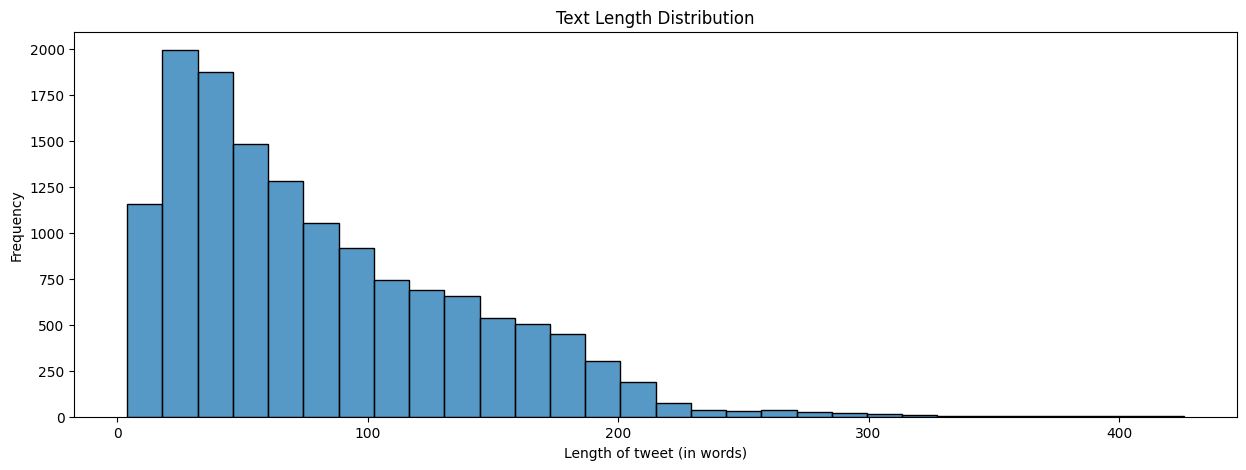

In [24]:
text_length_distribution(merged, 'tweet')

Number of 'OFF' tweets: 4092
Number of 'NOT' tweets: 8221


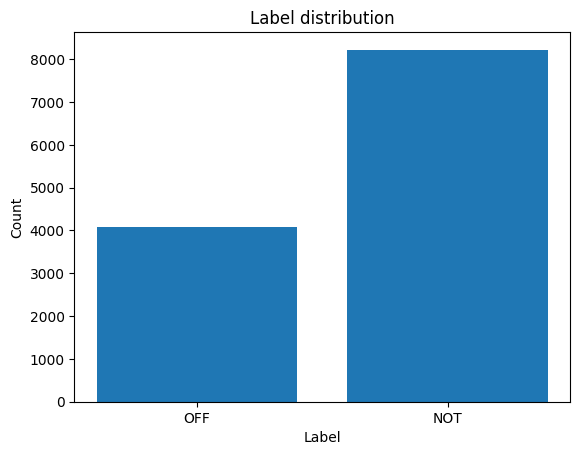

In [72]:
compute_label(Train)

Number of 'OFF' tweets: 240
Number of 'NOT' tweets: 620


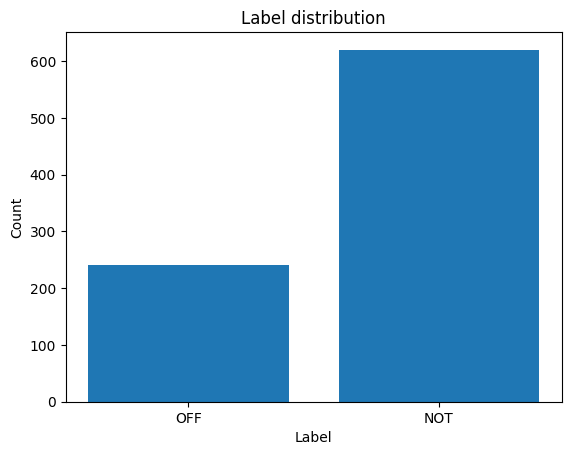

In [73]:
compute_label(Test)

Number of 'OFF' tweets: 308
Number of 'NOT' tweets: 619


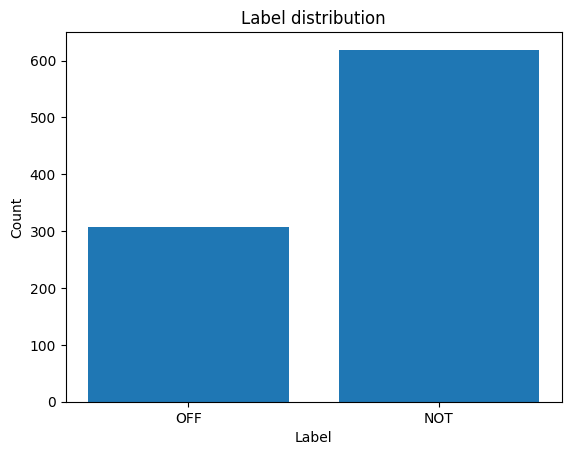

In [74]:
compute_label(Valid)

# Models Selection

Splitting of Train Data

In [80]:
# Divide the training dataset into 4  subsets using stratified sampling  into sizes of
#[25%, 50%, 75%, and 100%] such that all previous data points are included in the next one

# Define the target variable
target = 'label'

# Splitting the data into four subsets of 25% each
train_1, remaining_data = train_test_split(Train, test_size=0.75, stratify=Train[target], random_state=seed)
train_2, remaining_data = train_test_split(remaining_data, test_size=0.67, stratify=remaining_data[target], random_state=seed)
train_3, train_4 = train_test_split(remaining_data, test_size=0.5, stratify=remaining_data[target], random_state=seed)

# Create the subsets
subset_25 = train_1.copy()
subset_50 = pd.concat([train_1, train_2])
subset_75 = pd.concat([train_1, train_2, train_3])
subset_100 = pd.concat([train_1, train_2, train_3, train_4])

# Confirming  if the subsets  maintained the class distributions of the original dataset
trainset_25 = subset_25.groupby(['label']).size().div(len(subset_25)).mul(100)
trainset_50 = subset_50.groupby(['label']).size().div(len(subset_50)).mul(100)
trainset_75 = subset_75.groupby(['label']).size().div(len(subset_75)).mul(100)
trainset_100 = subset_100.groupby(['label']).size().div(len(subset_100)).mul(100)

# Printing the results
subsets = [(25, trainset_25), (50, trainset_50), (75, trainset_75), (100, trainset_100)]
for subset in subsets:
    print(f'Subset_{subset[0]}:\nOffensive tweets: {subset[1][1]:.2f}%\nNon-offensive tweets: {subset[1][0]:.2f}%\n')


# Saving the dataframes as CSV files
subset_25.to_csv('subset_25.csv', index=False)
subset_50.to_csv('subset_50.csv', index=False)
subset_75.to_csv('subset_75.csv', index=False)
subset_100.to_csv('subset_100.csv', index=False)

# Setting the file paths to save the CSV files

file_path_25 = os.path.join(GOOGLE_DRIVE_PATH, 'trainfiles', 'subset_25.csv')
file_path_50 = os.path.join(GOOGLE_DRIVE_PATH, 'trainfiles', 'subset_50.csv')
file_path_75 = os.path.join(GOOGLE_DRIVE_PATH, 'trainfiles', 'subset_75.csv')
file_path_100 = os.path.join(GOOGLE_DRIVE_PATH, 'trainfiles', 'subset_100.csv')

# Confirming their storage path
print('subset_25: ', file_path_25)
print('subset_50: ', file_path_50)
print('subset_75: ', file_path_75)
print('subset_100: ', file_path_100)



Subset_25:
Offensive tweets: 33.24%
Non-offensive tweets: 66.76%

Subset_50:
Offensive tweets: 33.24%
Non-offensive tweets: 66.76%

Subset_75:
Offensive tweets: 33.24%
Non-offensive tweets: 66.76%

Subset_100:
Offensive tweets: 33.23%
Non-offensive tweets: 66.77%

subset_25:  gdrive/MyDrive/./CE807/Assignment2/2207938/trainfiles/subset_25.csv
subset_50:  gdrive/MyDrive/./CE807/Assignment2/2207938/trainfiles/subset_50.csv
subset_75:  gdrive/MyDrive/./CE807/Assignment2/2207938/trainfiles/subset_75.csv
subset_100:  gdrive/MyDrive/./CE807/Assignment2/2207938/trainfiles/subset_100.csv


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3078 entries, 1720 to 8414
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3078 non-null   int64 
 1   tweet   3078 non-null   object
 2   label   3078 non-null   object
dtypes: int64(1), object(2)
memory usage: 96.2+ KB
Number of 'OFF' tweets: 1023
Number of 'NOT' tweets: 2055


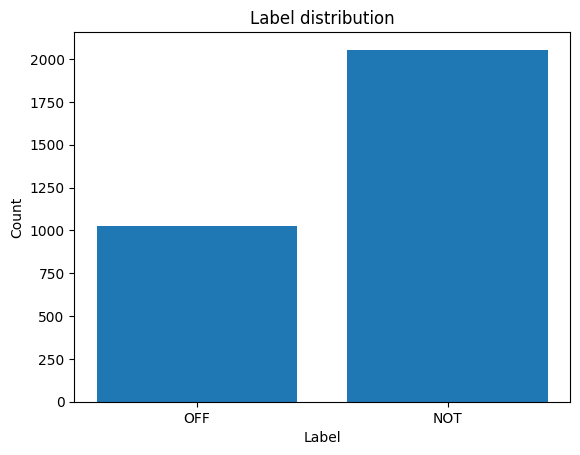

In [81]:
#with the rows being 12313 in total which is an odd number, 5% of 12313 = 3,078.25. Hence an expected increase of 3,078 0r 3,079 on all the subsets.
subset_25.info()
subset_25
#expected entries = 3,078 0r 3,079

compute_label(subset_25)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6125 entries, 1720 to 8866
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6125 non-null   int64 
 1   tweet   6125 non-null   object
 2   label   6125 non-null   object
dtypes: int64(1), object(2)
memory usage: 191.4+ KB
Number of 'OFF' tweets: 2036
Number of 'NOT' tweets: 4089


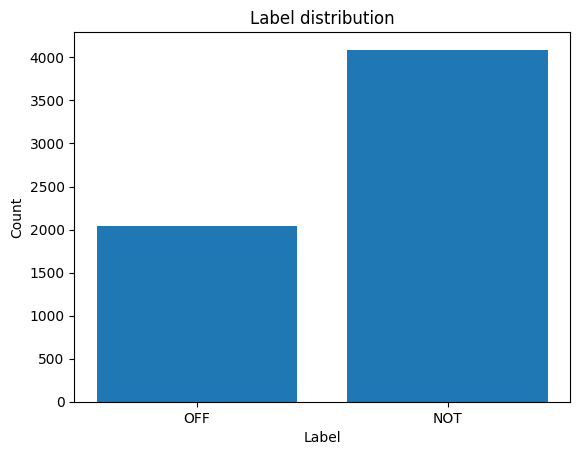

In [82]:
subset_50.info()
subset_50
#expected entries = 6,156 0r 6,157
compute_label(subset_50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9219 entries, 1720 to 6689
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9219 non-null   int64 
 1   tweet   9219 non-null   object
 2   label   9219 non-null   object
dtypes: int64(1), object(2)
memory usage: 288.1+ KB
Number of 'OFF' tweets: 2036
Number of 'NOT' tweets: 4089


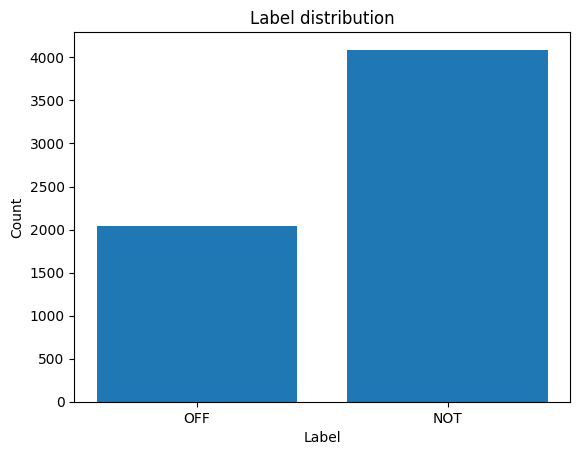

In [77]:
subset_75.info()
subset_75
#expected entries = 9,234 0r 9,235
compute_label(subset_50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12313 entries, 1720 to 9365
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 384.8+ KB
Number of 'OFF' tweets: 4092
Number of 'NOT' tweets: 8221


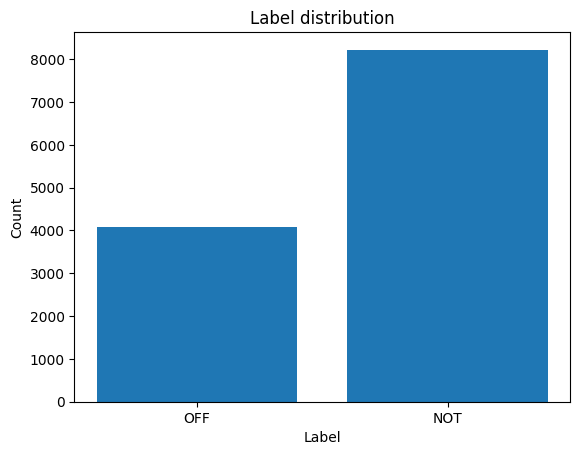

In [84]:
subset_100.info()
subset_100
#expected entries = 12313
compute_label(subset_100)

# Train Method 1

In [30]:
#highlighting the performance metrics
def compute_performance(y_true, y_pred):
    # Compute the performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = (confusion_matrix(y_true, y_pred))


    # Printing classification report and confusion matrix
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

    # Printing performance metrics
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.3f}')
    print(f'Precision: {precision_score(y_true, y_pred):.3f}')
    print(f'Recall: {recall_score(y_true, y_pred):.3f}')
    print(f'F1 Score: {f1_score(y_true, y_pred):.3f}')

    # Plotting the performance metrics
    fig, axs = plt.subplots(2, 2, figsize=(5, 5))
    axs[0, 0].bar(['Accuracy'], [accuracy_score(y_true, y_pred)], color='blue')
    axs[0, 1].bar(['Precision'], [precision_score(y_true, y_pred)], color='green')
    axs[1, 0].bar(['Recall'], [recall_score(y_true, y_pred)], color='orange')
    axs[1, 1].bar(['F1 Score'], [f1_score(y_true, y_pred)], color='red')
    plt.show()
    
    # Plotting confusion matrix as heatmap
    sns.heatmap(cm, annot=True, cmap='Reds' )
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

  

In [31]:
#defining  a function for train method 1 that'll accept input of paths to the different files called

def train_method1(train_file, val_file, model_dir):
  
    df_train = pd.read_csv(train_file)
    df_val= pd.read_csv(val_file)

    text_column = 'tweet'
    target_column = 'label'

    # Extracting features and target variables from train and validation data
    X_train, y_train = df_train[text_column], df_train[target_column]
    X_valid, y_valid = df_val[text_column], df_val[target_column]

    # converting the data into vectors using a CountVectorizer
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_valid = vectorizer.transform(X_valid)

    y_train = df_train[target_column].replace({'NOT': 0, 'OFF': 1})
    y_valid = df_val[target_column].replace({'NOT': 0, 'OFF': 1})

    #identifying the model
    svm_model = SVC(random_state=student_id)

    # Defining the hyperparameters to search over
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
    # Performing grid search
    grid = GridSearchCV(svm_model, param_grid, cv=5)
    grid.fit(X_train, y_train)

    # Predicting on validation set
    y_pred = grid.predict(X_valid)
    compute_performance(y_valid, y_pred)
    
    # Saving the model in the required path
    joblib.dump(grid, model_dir + "model.sav")
    print('Model has been saved to {}'. format(model_dir))

    return compute_performance(y_valid, y_pred)


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       619
           1       0.70      0.53      0.60       308

    accuracy                           0.77       927
   macro avg       0.75      0.71      0.72       927
weighted avg       0.76      0.77      0.76       927

[[549  70]
 [145 163]]
Accuracy: 0.768
Precision: 0.700
Recall: 0.529
F1 Score: 0.603


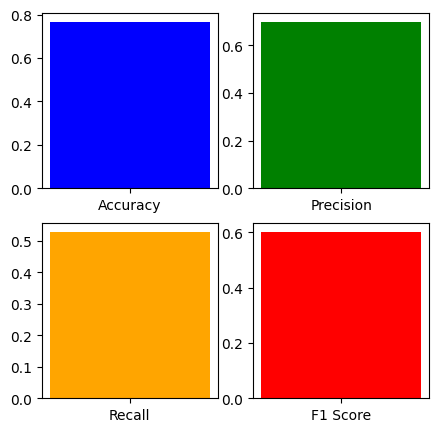

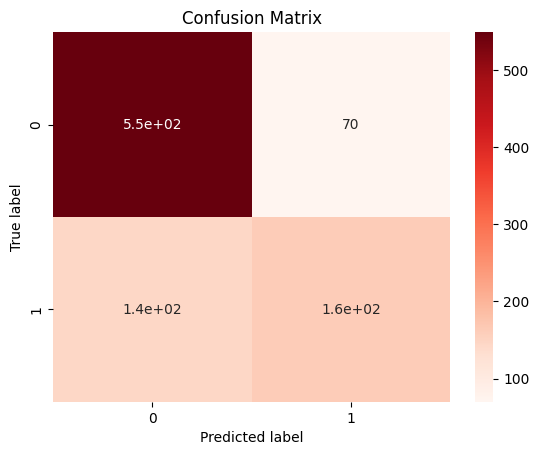

Model has been saved to gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       619
           1       0.70      0.53      0.60       308

    accuracy                           0.77       927
   macro avg       0.75      0.71      0.72       927
weighted avg       0.76      0.77      0.76       927

[[549  70]
 [145 163]]
Accuracy: 0.768
Precision: 0.700
Recall: 0.529
F1 Score: 0.603


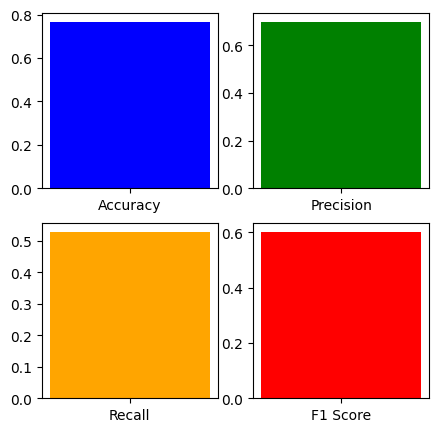

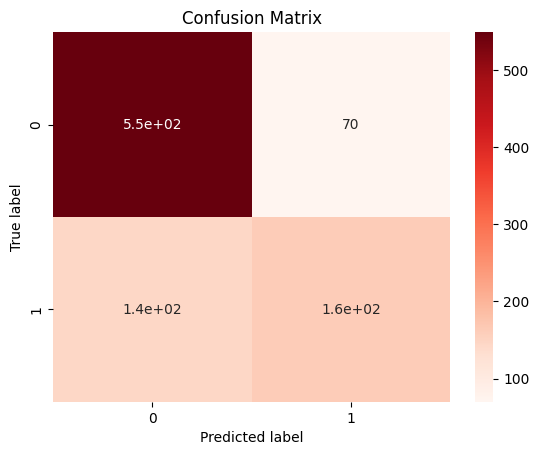

In [32]:
#passing the required files to the train function
train_file = '/content/PreprocessedTrain.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/'

Train1_model = train_method1(train_file, val_file, model_dir)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       619
           1       0.70      0.48      0.57       308

    accuracy                           0.76       927
   macro avg       0.74      0.69      0.70       927
weighted avg       0.75      0.76      0.75       927

[[557  62]
 [161 147]]
Accuracy: 0.759
Precision: 0.703
Recall: 0.477
F1 Score: 0.569


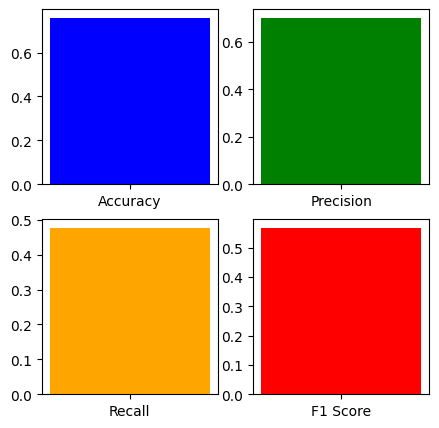

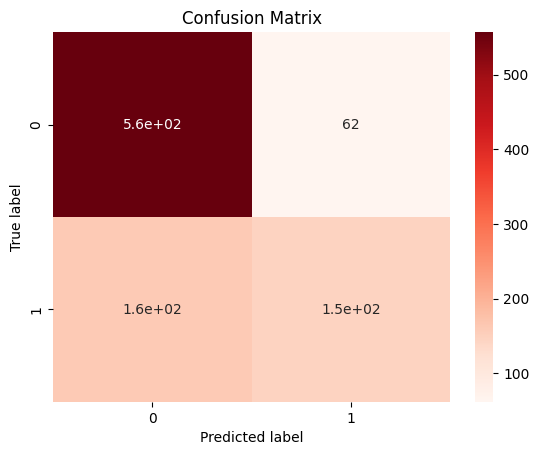

Model has been saved to gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/25/
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       619
           1       0.70      0.48      0.57       308

    accuracy                           0.76       927
   macro avg       0.74      0.69      0.70       927
weighted avg       0.75      0.76      0.75       927

[[557  62]
 [161 147]]
Accuracy: 0.759
Precision: 0.703
Recall: 0.477
F1 Score: 0.569


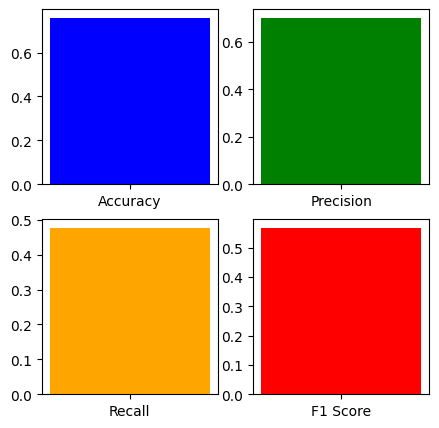

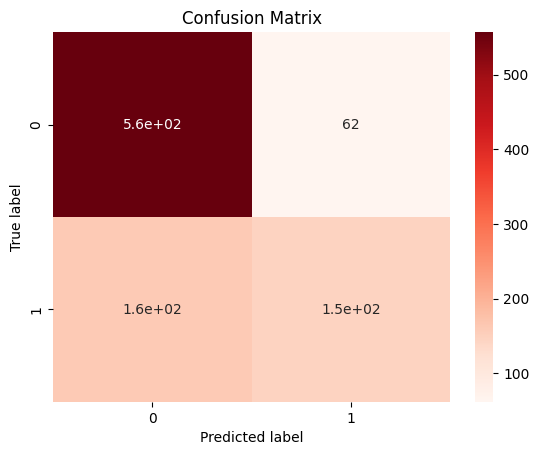

In [43]:
#training on subset_25
train_file = '/content/subset_25.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/25/'

train1_25 = train_method1(train_file, val_file, model_dir)


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       619
           1       0.68      0.50      0.58       308

    accuracy                           0.76       927
   macro avg       0.73      0.69      0.70       927
weighted avg       0.75      0.76      0.75       927

[[547  72]
 [153 155]]
Accuracy: 0.757
Precision: 0.683
Recall: 0.503
F1 Score: 0.579


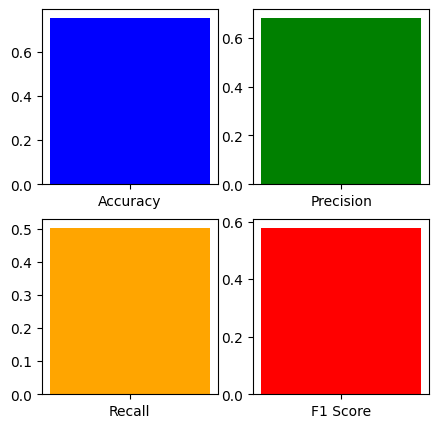

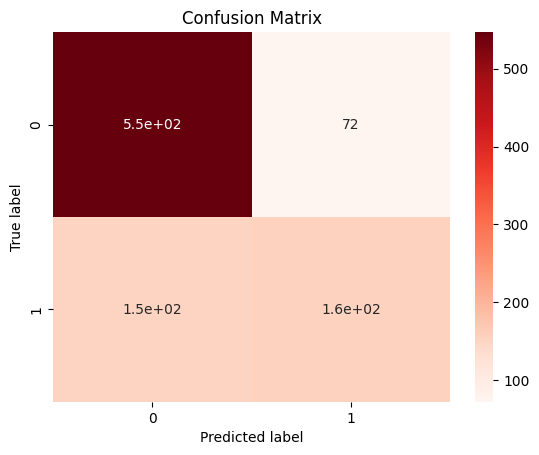

Model has been saved to gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/50/
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       619
           1       0.68      0.50      0.58       308

    accuracy                           0.76       927
   macro avg       0.73      0.69      0.70       927
weighted avg       0.75      0.76      0.75       927

[[547  72]
 [153 155]]
Accuracy: 0.757
Precision: 0.683
Recall: 0.503
F1 Score: 0.579


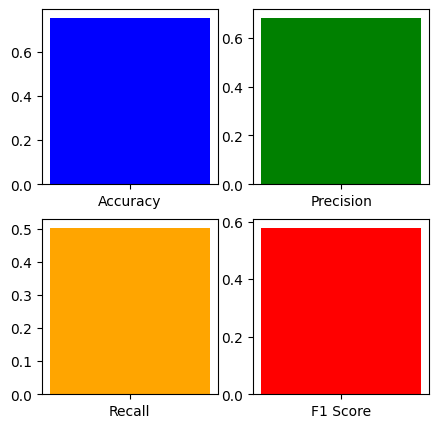

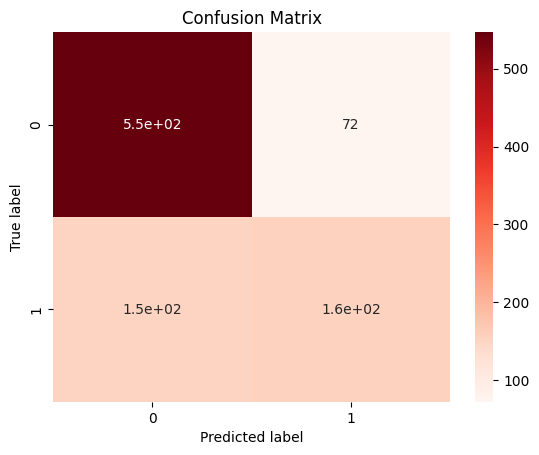

In [44]:
#training on subset_50
train_file = '/content/subset_50.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/50/'
train1_50 = train_method1(train_file, val_file, model_dir)


              precision    recall  f1-score   support

           0       0.78      0.88      0.83       619
           1       0.68      0.51      0.58       308

    accuracy                           0.76       927
   macro avg       0.73      0.69      0.70       927
weighted avg       0.75      0.76      0.75       927

[[544  75]
 [151 157]]
Accuracy: 0.756
Precision: 0.677
Recall: 0.510
F1 Score: 0.581


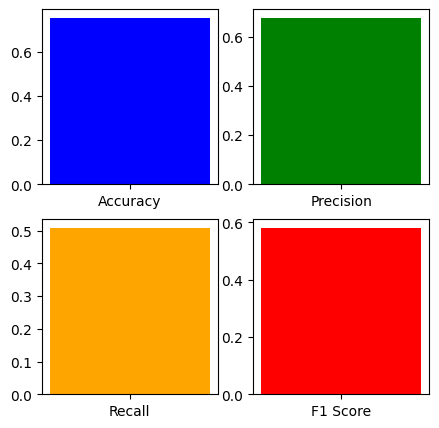

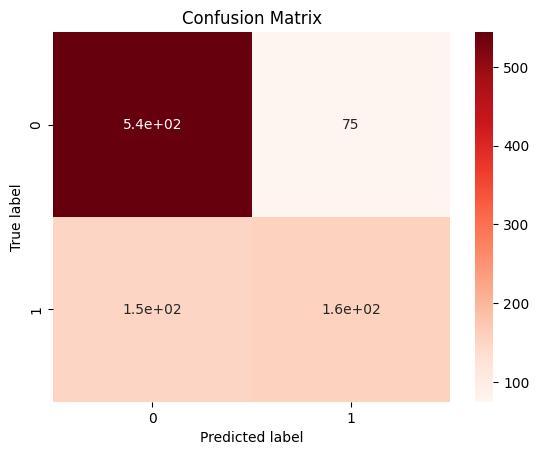

Model has been saved to gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/75/
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       619
           1       0.68      0.51      0.58       308

    accuracy                           0.76       927
   macro avg       0.73      0.69      0.70       927
weighted avg       0.75      0.76      0.75       927

[[544  75]
 [151 157]]
Accuracy: 0.756
Precision: 0.677
Recall: 0.510
F1 Score: 0.581


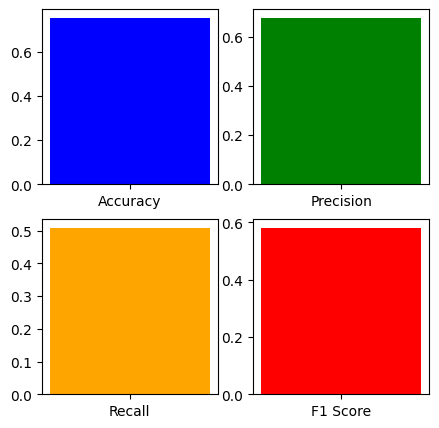

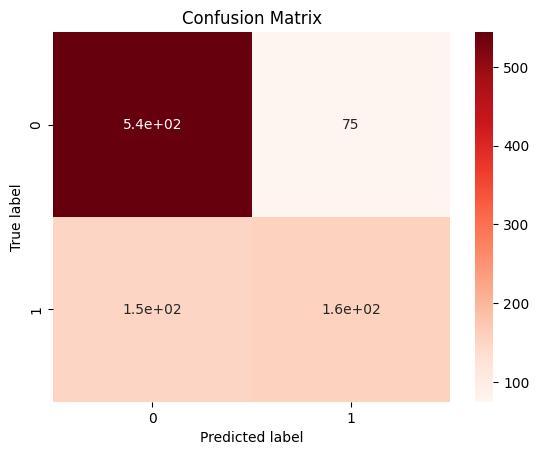

In [45]:
#training on subset_75
train_file = '/content/subset_75.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/75/'
train1_75 = train_method1(train_file, val_file, model_dir)


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       619
           1       0.70      0.53      0.60       308

    accuracy                           0.77       927
   macro avg       0.75      0.71      0.72       927
weighted avg       0.76      0.77      0.76       927

[[549  70]
 [145 163]]
Accuracy: 0.768
Precision: 0.700
Recall: 0.529
F1 Score: 0.603


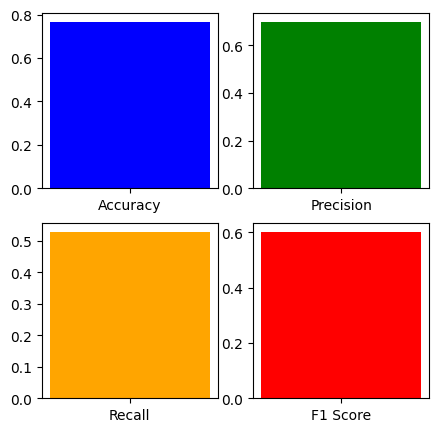

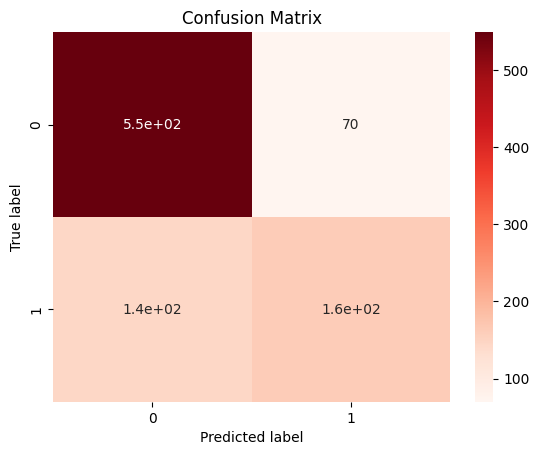

Model has been saved to gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/100/
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       619
           1       0.70      0.53      0.60       308

    accuracy                           0.77       927
   macro avg       0.75      0.71      0.72       927
weighted avg       0.76      0.77      0.76       927

[[549  70]
 [145 163]]
Accuracy: 0.768
Precision: 0.700
Recall: 0.529
F1 Score: 0.603


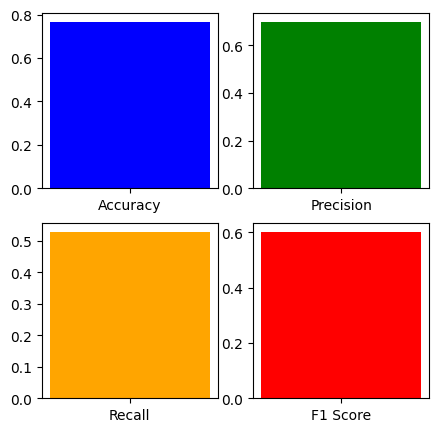

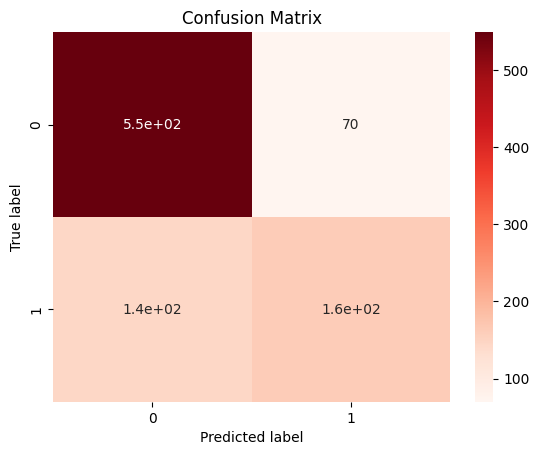

In [46]:
#training on subset_100( although train_method1 = train1_100)
train_file = '/content/subset_100.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/100/'

train1_100 = train_method1(train_file, val_file, model_dir)


# Test For Method 1

In [47]:
#defining  a function for testmethod 1 that'll accept input of paths to the different files
def test_method1(test_file, model_file, output_dir):
    # Loading the  test file
    dff_test = pd.read_csv(test_file)

    # Loading the  model
    model = joblib.load(model_file)

    #seperating the tweet column from the label colum
    test_tweet = dff_test['tweet']
    test_label = dff_test['label']


    #using countvectorizer to change the tweet column to vectors
    vectorizer = CountVectorizer()
    df_test= vectorizer.fit_transform(test_tweet)
    

    # Predicting  on the test file 
    y_pred = model.predict(df_test)

    y_test = test_label.replace({'NOT': 0, 'OFF': 1})

    compute_performance(y_test, y_pred)


    # Save output file as csv
    output_df = pd.DataFrame({'text': test_tweet, 'label': test_label, 'out_label': y_pred})
    output_file = os.path.join(output_dir, 'method1_test_output.csv')
    output_df.to_csv(output_file, index=1)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8221
           1       0.98      0.88      0.92      4092

    accuracy                           0.95     12313
   macro avg       0.96      0.93      0.94     12313
weighted avg       0.95      0.95      0.95     12313

[[8137   84]
 [ 507 3585]]
Accuracy: 0.952
Precision: 0.977
Recall: 0.876
F1 Score: 0.924


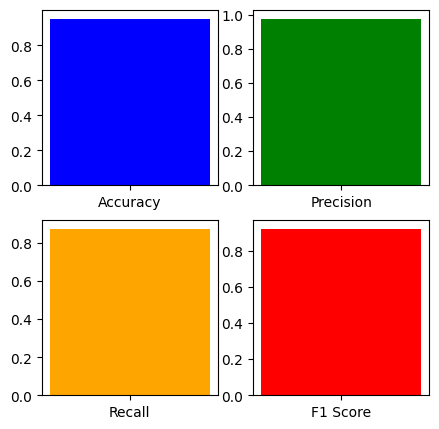

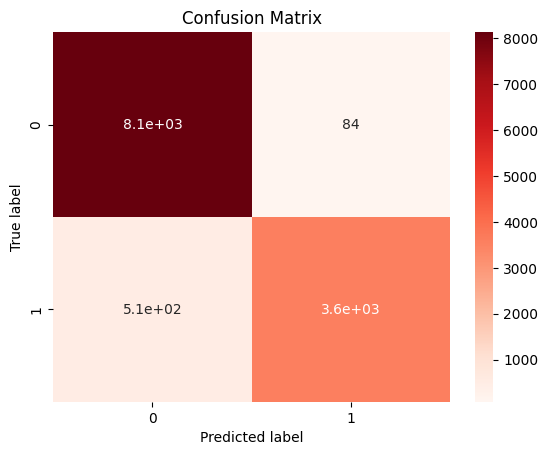

In [48]:
test_file = '/content/PreprocessedTrain.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/output/'
test1= test_method1(test_file, model_dir, output_dir)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2055
           1       0.99      0.92      0.95      1023

    accuracy                           0.97      3078
   macro avg       0.97      0.96      0.96      3078
weighted avg       0.97      0.97      0.97      3078

[[2044   11]
 [  84  939]]
Accuracy: 0.969
Precision: 0.988
Recall: 0.918
F1 Score: 0.952


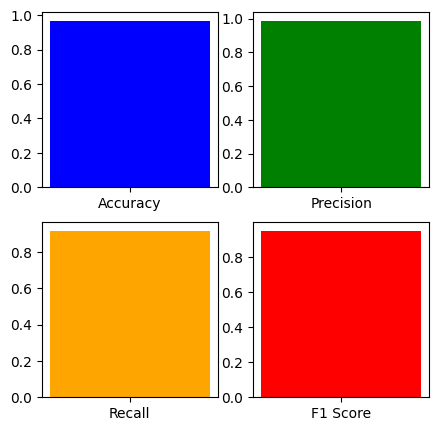

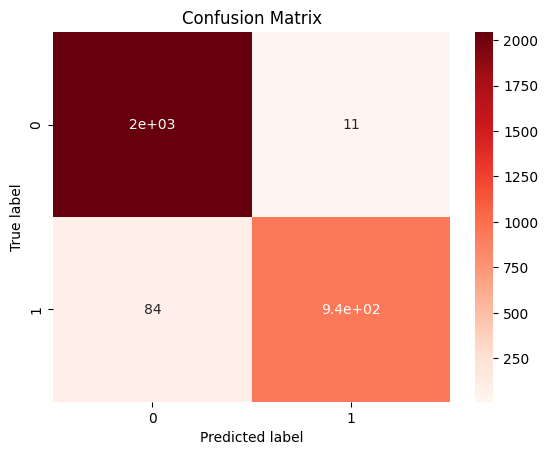

In [49]:
#testing using 25% train data model
test_file = '/content/subset_25.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/25/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/25/output/'
test1_50 = test_method1(test_file, model_dir, output_dir)



              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4089
           1       0.99      0.89      0.93      2036

    accuracy                           0.96      6125
   macro avg       0.97      0.94      0.95      6125
weighted avg       0.96      0.96      0.96      6125

[[4063   26]
 [ 230 1806]]
Accuracy: 0.958
Precision: 0.986
Recall: 0.887
F1 Score: 0.934


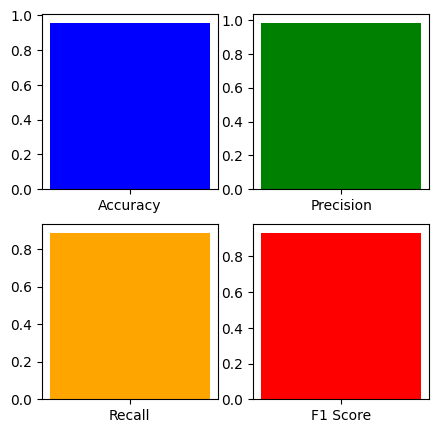

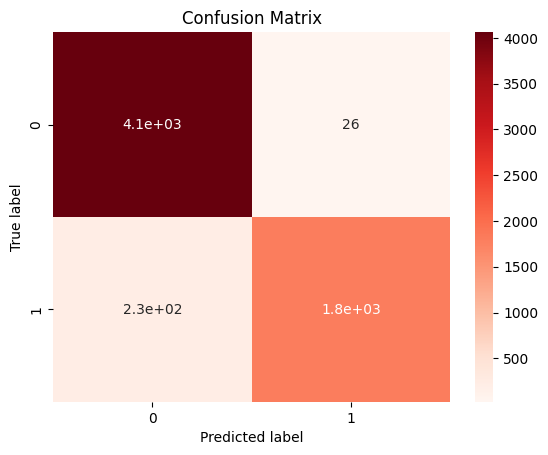

In [50]:
#testing using 50% train data model
test_file = '/content/subset_50.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/50/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/50/output/'
test1_50 = test_method1(test_file, model_dir, output_dir)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6155
           1       0.98      0.88      0.93      3064

    accuracy                           0.95      9219
   macro avg       0.96      0.94      0.95      9219
weighted avg       0.96      0.95      0.95      9219

[[6102   53]
 [ 364 2700]]
Accuracy: 0.955
Precision: 0.981
Recall: 0.881
F1 Score: 0.928


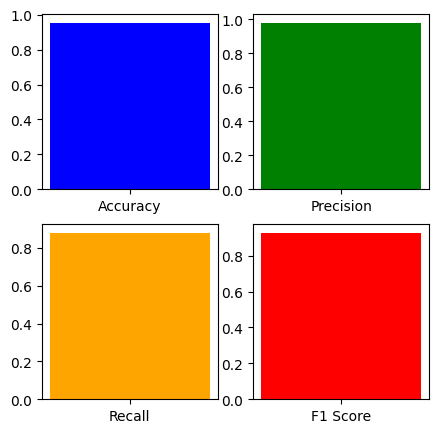

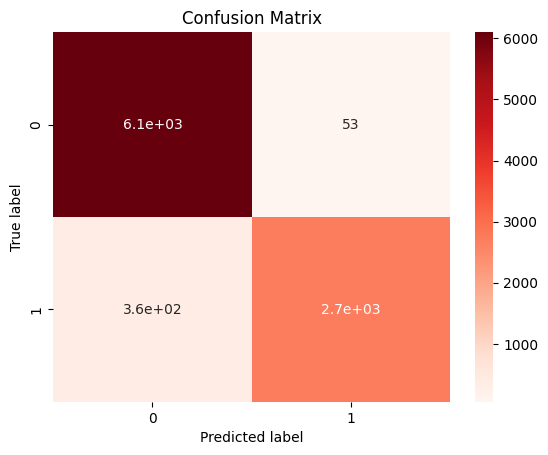

In [51]:
#testing using 75% train data model

test_file = '/content/subset_75.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/75/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/75/output/'
test1_75 = test_method1(test_file, model_dir, output_dir)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8221
           1       0.98      0.88      0.92      4092

    accuracy                           0.95     12313
   macro avg       0.96      0.93      0.94     12313
weighted avg       0.95      0.95      0.95     12313

[[8137   84]
 [ 507 3585]]
Accuracy: 0.952
Precision: 0.977
Recall: 0.876
F1 Score: 0.924


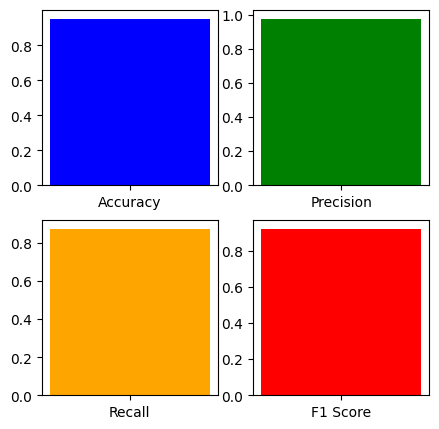

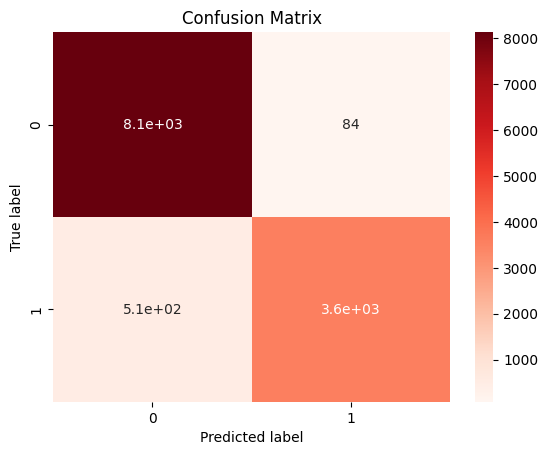

In [52]:
#testing using 100% train data model
test_file = '/content/subset_100.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/100/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/1/100/output/'
test1_100 = test_method1(test_file, model_dir, output_dir)

# Train Method 2

In [53]:
def train_method2(train_file, val_file, model_dir):
  
    df_train = pd.read_csv(train_file)
    df_val= pd.read_csv(val_file)

    text_column = 'tweet'
    target_column = 'label'

    # Extract features and target variables from train and validation data
    X_train, y_train = df_train[text_column], df_train[target_column]
    X_valid, y_valid = df_val[text_column], df_val[target_column]

    # converting the data into vectors using a CountVectorizer
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_valid = vectorizer.transform(X_valid)

    y_train = df_train[target_column].replace({'NOT': 0, 'OFF': 1})
    y_valid = df_val[target_column].replace({'NOT': 0, 'OFF': 1})


    # Create a pipeline for the decision tree model
    dt_model = DecisionTreeClassifier(random_state=student_id)

    # Define the hyperparameters to search over
    param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
    # Perform grid search
    grid = GridSearchCV(dt_model, param_grid, cv=5)
    grid.fit(X_train, y_train)

    # Predict on validation set
    y_pred = grid.predict(X_valid)
    compute_performance(y_valid, y_pred)
    
    # Saving the model in the required path
    joblib.dump(grid, model_dir + "model.sav")
    print(f'Saved model to {model_dir}')

    return compute_performance(y_valid, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       619
           1       0.82      0.31      0.45       308

    accuracy                           0.75       927
   macro avg       0.78      0.64      0.64       927
weighted avg       0.77      0.75      0.71       927

[[598  21]
 [212  96]]
Accuracy: 0.749
Precision: 0.821
Recall: 0.312
F1 Score: 0.452


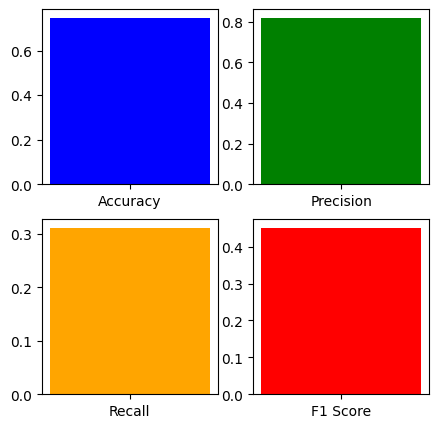

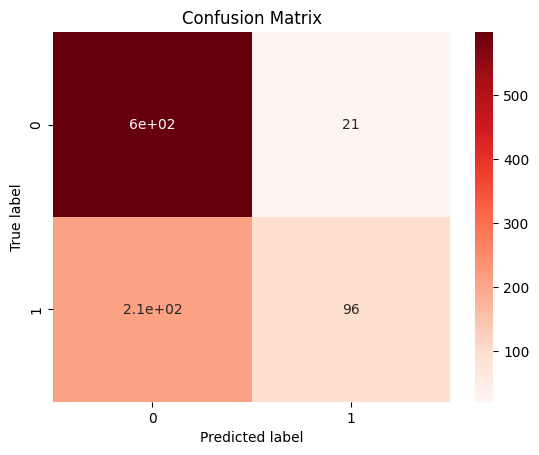

Saved model to gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       619
           1       0.82      0.31      0.45       308

    accuracy                           0.75       927
   macro avg       0.78      0.64      0.64       927
weighted avg       0.77      0.75      0.71       927

[[598  21]
 [212  96]]
Accuracy: 0.749
Precision: 0.821
Recall: 0.312
F1 Score: 0.452


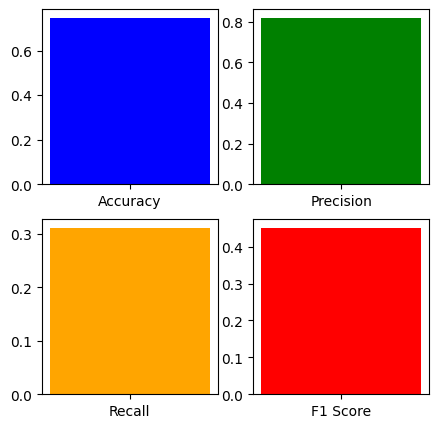

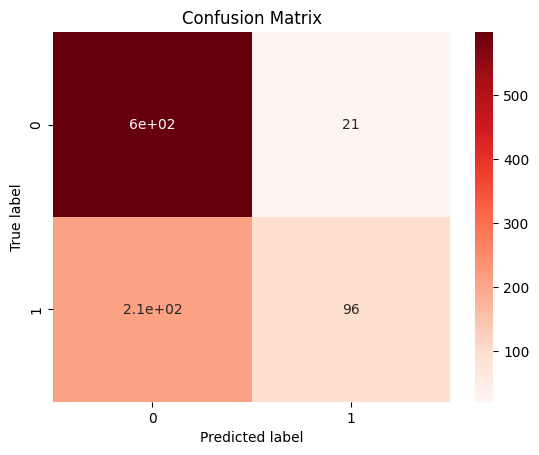

In [54]:
#passing the required files to the train function
train_file = '/content/PreprocessedTrain.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/'

Train2_model = train_method2(train_file, val_file, model_dir)

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       619
           1       0.86      0.27      0.41       308

    accuracy                           0.74       927
   macro avg       0.79      0.63      0.62       927
weighted avg       0.77      0.74      0.70       927

[[605  14]
 [224  84]]
Accuracy: 0.743
Precision: 0.857
Recall: 0.273
F1 Score: 0.414


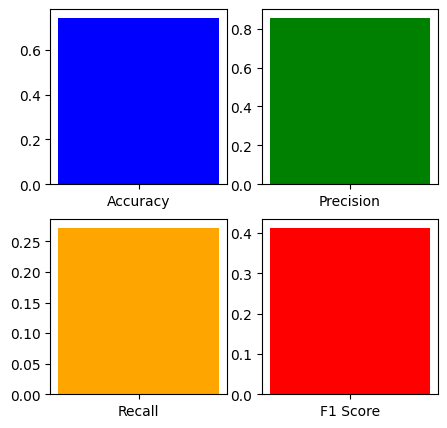

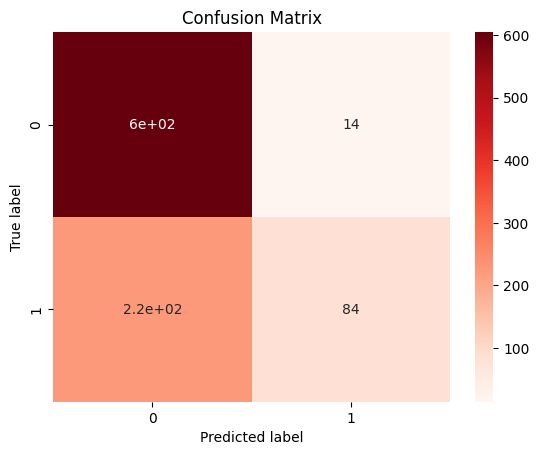

Saved model to gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/25/
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       619
           1       0.86      0.27      0.41       308

    accuracy                           0.74       927
   macro avg       0.79      0.63      0.62       927
weighted avg       0.77      0.74      0.70       927

[[605  14]
 [224  84]]
Accuracy: 0.743
Precision: 0.857
Recall: 0.273
F1 Score: 0.414


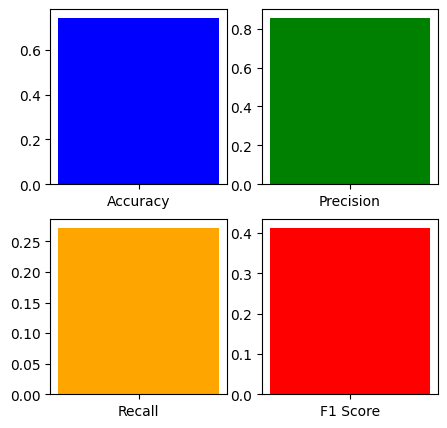

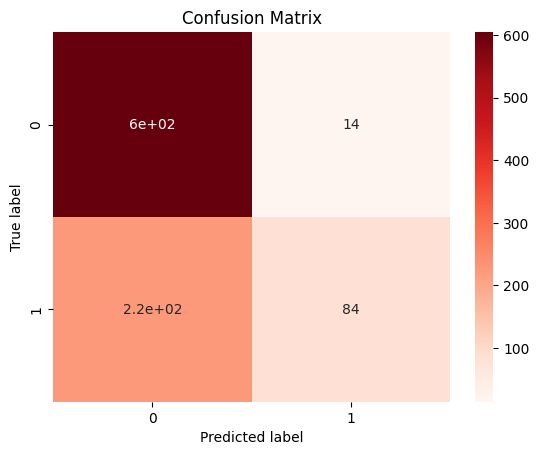

In [55]:
#training on subset_25
train_file = '/content/subset_25.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/25/'

train2_25 = train_method2(train_file, val_file, model_dir)


              precision    recall  f1-score   support

           0       0.75      0.96      0.84       619
           1       0.82      0.35      0.49       308

    accuracy                           0.76       927
   macro avg       0.79      0.66      0.67       927
weighted avg       0.77      0.76      0.73       927

[[596  23]
 [200 108]]
Accuracy: 0.759
Precision: 0.824
Recall: 0.351
F1 Score: 0.492


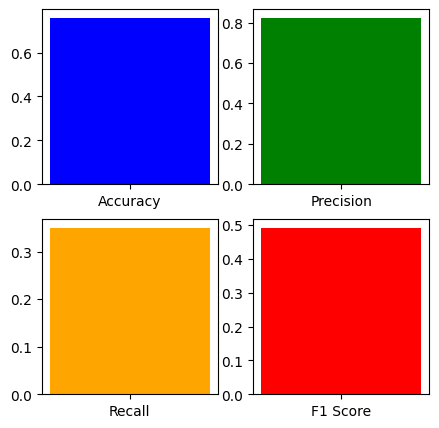

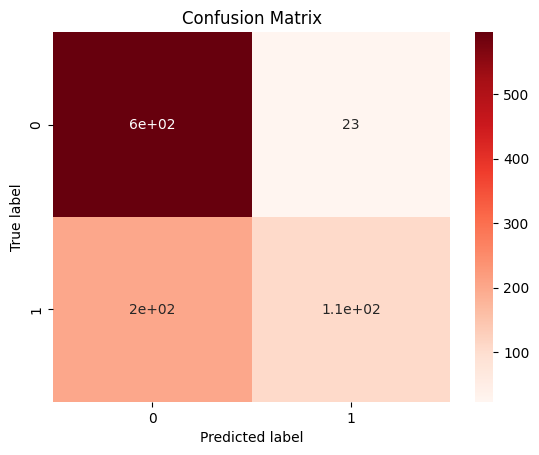

Saved model to gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/50/
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       619
           1       0.82      0.35      0.49       308

    accuracy                           0.76       927
   macro avg       0.79      0.66      0.67       927
weighted avg       0.77      0.76      0.73       927

[[596  23]
 [200 108]]
Accuracy: 0.759
Precision: 0.824
Recall: 0.351
F1 Score: 0.492


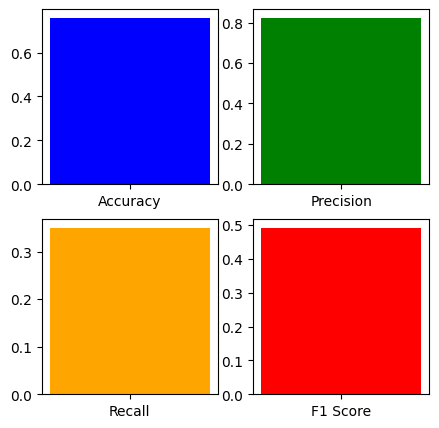

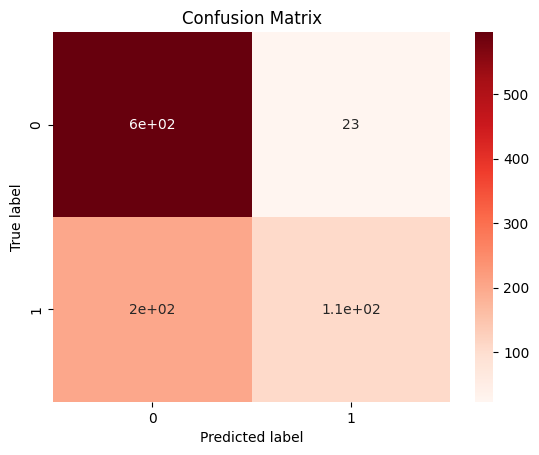

In [56]:
#training on subset_50
train_file = '/content/subset_50.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/50/'
train2_50 = train_method2(train_file, val_file, model_dir)


              precision    recall  f1-score   support

           0       0.74      0.96      0.84       619
           1       0.81      0.34      0.48       308

    accuracy                           0.75       927
   macro avg       0.78      0.65      0.66       927
weighted avg       0.77      0.75      0.72       927

[[595  24]
 [204 104]]
Accuracy: 0.754
Precision: 0.812
Recall: 0.338
F1 Score: 0.477


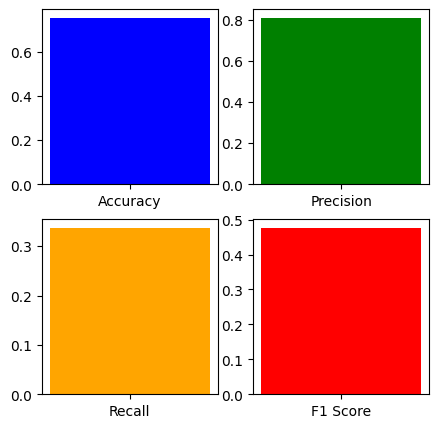

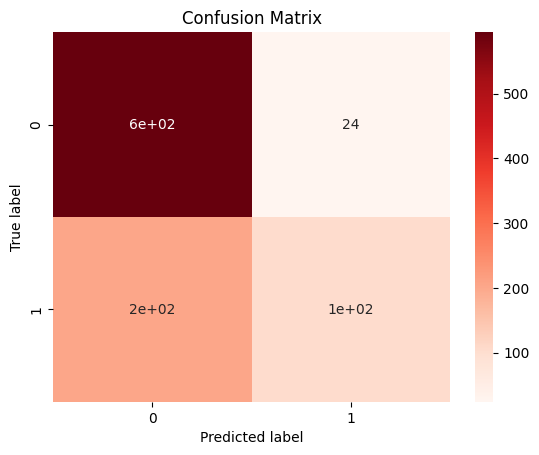

Saved model to gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/75/
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       619
           1       0.81      0.34      0.48       308

    accuracy                           0.75       927
   macro avg       0.78      0.65      0.66       927
weighted avg       0.77      0.75      0.72       927

[[595  24]
 [204 104]]
Accuracy: 0.754
Precision: 0.812
Recall: 0.338
F1 Score: 0.477


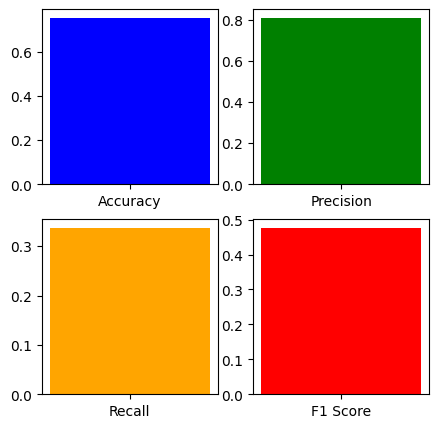

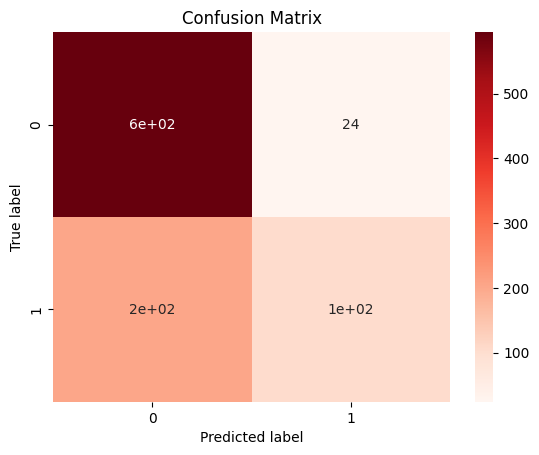

In [57]:
#training on subset_75
train_file = '/content/subset_75.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/75/'
train2_75 = train_method2(train_file, val_file, model_dir)


              precision    recall  f1-score   support

           0       0.74      0.97      0.84       619
           1       0.84      0.33      0.47       308

    accuracy                           0.76       927
   macro avg       0.79      0.65      0.66       927
weighted avg       0.78      0.76      0.72       927

[[600  19]
 [207 101]]
Accuracy: 0.756
Precision: 0.842
Recall: 0.328
F1 Score: 0.472


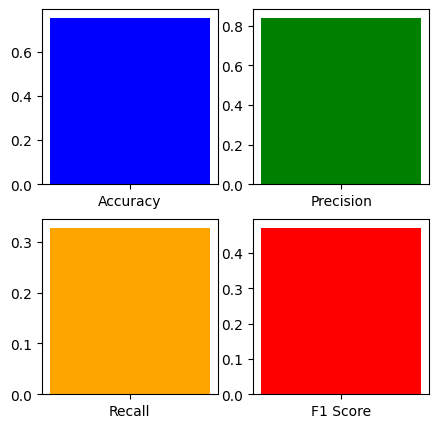

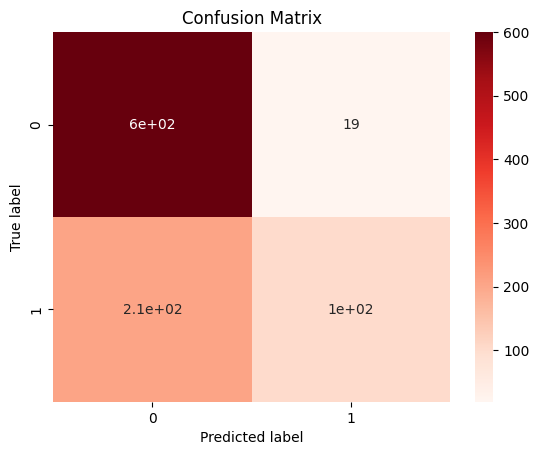

Saved model to gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/100/
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       619
           1       0.84      0.33      0.47       308

    accuracy                           0.76       927
   macro avg       0.79      0.65      0.66       927
weighted avg       0.78      0.76      0.72       927

[[600  19]
 [207 101]]
Accuracy: 0.756
Precision: 0.842
Recall: 0.328
F1 Score: 0.472


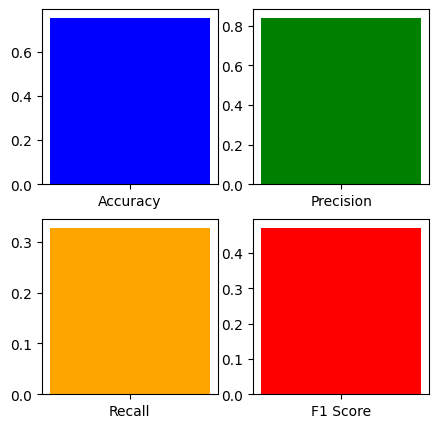

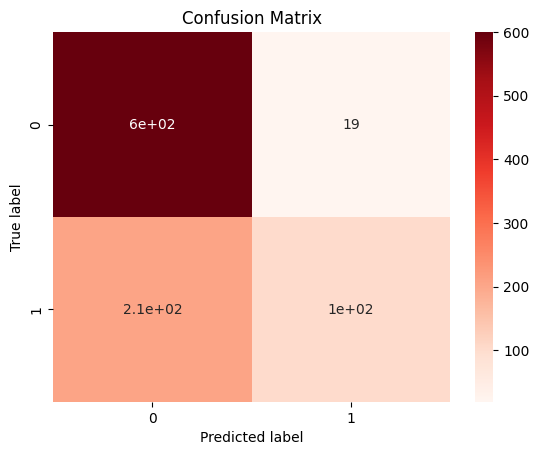

In [58]:
#training on subset_100( although train_method1 = train1_100)
train_file = '/content/subset_100.csv'
val_file = '/content/PreprocessedValid.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/100/'

train2_100 = train_method2(train_file, val_file, model_dir)


# Test For Method 2

In [85]:
#defining  a function for testmethod 2 that'll accept input of paths to the different files
def test_method2(test_file, model_file, output_dir):
     # Loading the  test file
    dff_test = pd.read_csv(test_file)

    # Loading the  model
    model = joblib.load(model_file)

    #seperating the tweet column from the label colum
    test_tweet = dff_test['tweet']
    test_label = dff_test['label']


    #using countvectorizer to change the tweet column to vectors
    vectorizer = CountVectorizer()
    df_test= vectorizer.fit_transform(test_tweet)
    

    
    # Predicting  on the test file 
    y_pred = model.predict(df_test)

    y_test = test_label.replace({'NOT': 0, 'OFF': 1})

    compute_performance(y_test, y_pred)


    # Save output file as csv
    output_df = pd.DataFrame({'text': test_tweet, 'label': test_label, 'out_label': y_pred})
    output_file = os.path.join(output_dir, 'method2_test_output.csv')
    output_df.to_csv(output_file, index=1)

              precision    recall  f1-score   support

           0       0.74      0.98      0.85      8221
           1       0.89      0.32      0.47      4092

    accuracy                           0.76     12313
   macro avg       0.81      0.65      0.66     12313
weighted avg       0.79      0.76      0.72     12313

[[8051  170]
 [2781 1311]]
Accuracy: 0.760
Precision: 0.885
Recall: 0.320
F1 Score: 0.470


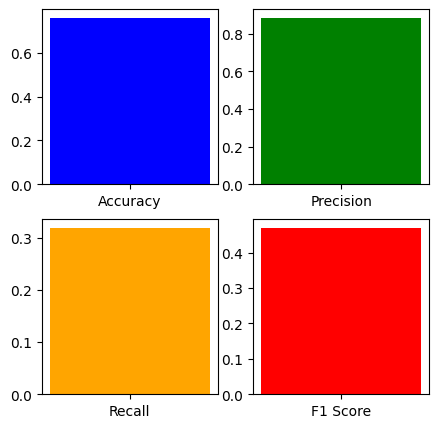

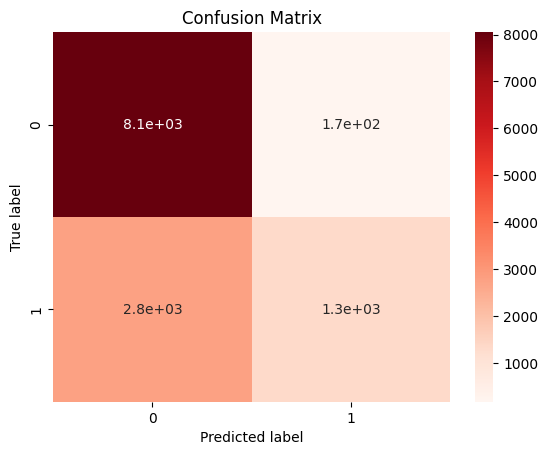

In [86]:
test_file = '/content/PreprocessedTrain.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/output/'
test2= test_method2(test_file, model_dir, output_dir)


              precision    recall  f1-score   support

           0       0.73      0.98      0.84      2055
           1       0.88      0.27      0.41      1023

    accuracy                           0.74      3078
   macro avg       0.81      0.63      0.62      3078
weighted avg       0.78      0.74      0.70      3078

[[2019   36]
 [ 749  274]]
Accuracy: 0.745
Precision: 0.884
Recall: 0.268
F1 Score: 0.411


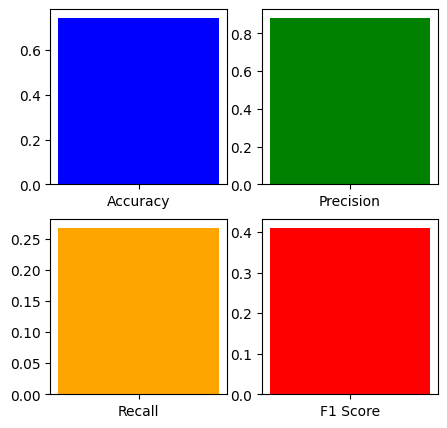

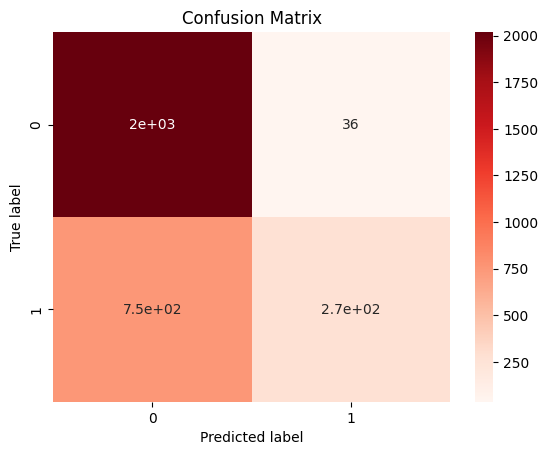

In [87]:
#testing using 25% train data model
test_file = '/content/subset_25.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/25/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/25/output/'
test2_50 = test_method2(test_file, model_dir, output_dir)



              precision    recall  f1-score   support

           0       0.74      0.98      0.85      4089
           1       0.88      0.33      0.48      2036

    accuracy                           0.76      6125
   macro avg       0.81      0.65      0.66      6125
weighted avg       0.79      0.76      0.72      6125

[[3996   93]
 [1371  665]]
Accuracy: 0.761
Precision: 0.877
Recall: 0.327
F1 Score: 0.476


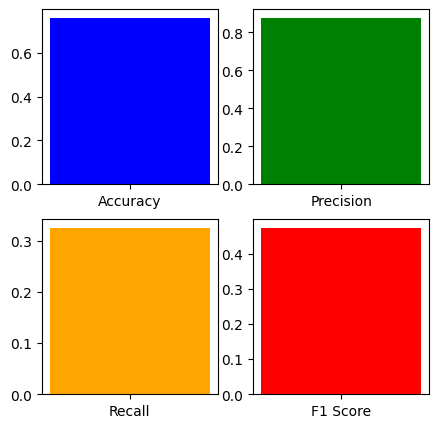

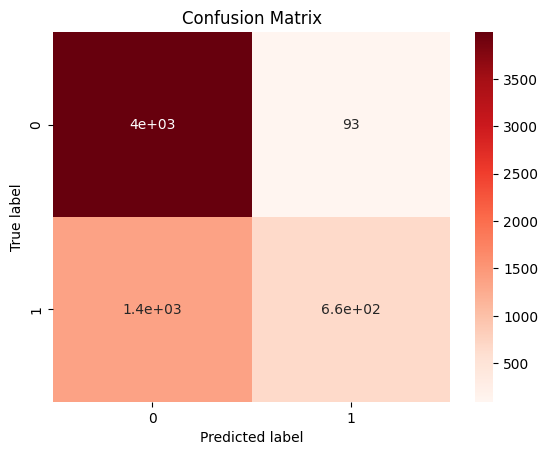

In [88]:
#testing using 50% train data model
test_file = '/content/subset_50.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/50/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/50/output/'
test2_50 = test_method2(test_file, model_dir, output_dir)

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      6155
           1       0.87      0.33      0.48      3064

    accuracy                           0.76      9219
   macro avg       0.81      0.65      0.66      9219
weighted avg       0.79      0.76      0.72      9219

[[6002  153]
 [2041 1023]]
Accuracy: 0.762
Precision: 0.870
Recall: 0.334
F1 Score: 0.483


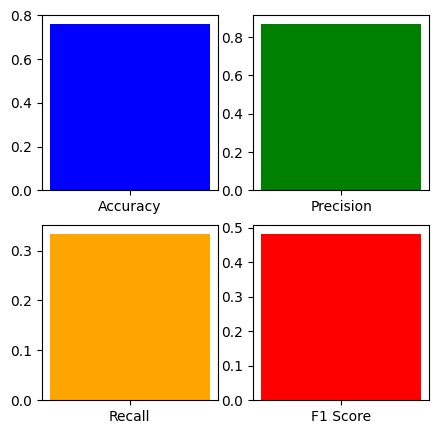

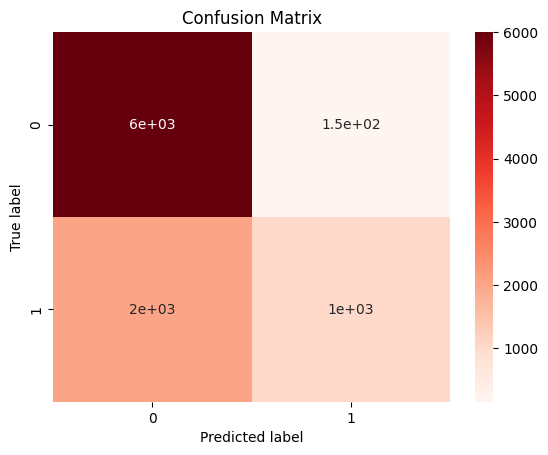

In [89]:
#testing using 75% train data model

test_file = '/content/subset_75.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/75/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/75/output/'
test2_75 = test_method2(test_file, model_dir, output_dir)

              precision    recall  f1-score   support

           0       0.75      0.99      0.85      8221
           1       0.96      0.33      0.49      4092

    accuracy                           0.77     12313
   macro avg       0.86      0.66      0.67     12313
weighted avg       0.82      0.77      0.73     12313

[[8166   55]
 [2731 1361]]
Accuracy: 0.774
Precision: 0.961
Recall: 0.333
F1 Score: 0.494


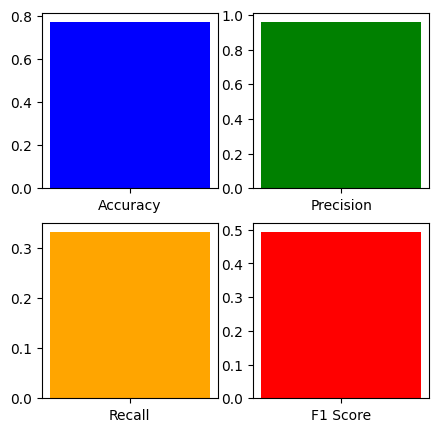

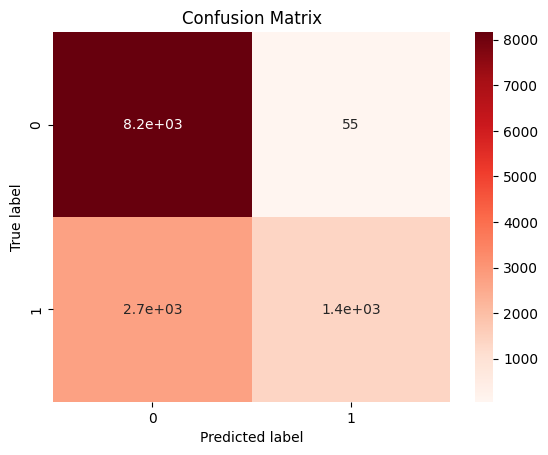

In [90]:
#testing using 100% train data model
test_file = '/content/subset_100.csv'
model_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/100/model.sav'
output_dir = 'gdrive/MyDrive/./CE807/Assignment2/2207938/models/2/100/output/'
test2_100 = test_method2(test_file, model_dir, output_dir)

# Other Model 

In [ ]:
# def train_svm(df_name, val_file, model_dir):
#     # Load the data
#     df = pd.read_csv(df_name)
#     val_df = pd.read_csv(val_file)

#     text_col = 'tweet'
#     # target_col = 'label'
    
#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(df[text_col], df[target_col], random_state=2207938)
    
#     # Create a pipeline for the SVM model
#     pipeline = Pipeline([
#         ('tfidf', TfidfVectorizer()),
#         ('svm', SVC())
#     ])
    
#     # Define the hyperparameters to search over
#     param_grid = {
#         'tfidf__max_df': [0.5, 0.75, 1.0],
#         'tfidf__ngram_range': [(1, 1), (1, 2), (2, 2)],
#         'svm__C': [0.1, 1, 10],
#         'svm__kernel': ['linear', 'rbf']
#     }
    
#     # Use GridSearchCV to find the best hyperparameters
#     grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
#     grid_search.fit(X_train, y_train)
    
#     # Make predictions on the test data
#     y_pred = grid_search.predict(X_test)
    
#     # Evaluate the model on the test data
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
    
#     # Display the performance metrics and the confusion matrix
#     print('Accuracy:', accuracy)
#     print('Precision:', precision)
#     print('Recall:', recall)
#     print('F1 Score:', f1)
#     print('Confusion Matrix:')
#     print(confusion_matrix(y_test, y_pred))
    
#     # Save the model
#     joblib.dump(grid_search.best_estimator_, model_dir)
    
#     # Evaluate the model on the validation data
#     val_X = val_df[text_col]
#     val_y = val_df[target_col]
#     val_pred = grid_search.predict(val_X)
#     val_accuracy = accuracy_score(val_y, val_pred)
#     val_precision = precision_score(val_y, val_pred, average='weighted')
#     val_recall = recall_score(val_y, val_pred, average='weighted')
#     val_f1 = f1_score(val_y, val_pred, average='weighted')
    
#     # Display the performance metrics and the confusion matrix on the validation data
#     print('Validation Accuracy:', val_accuracy)
#     print('Validation Precision:', val_precision)
#     print('Validation Recall:', val_recall)
#     print('Validation F1 Score:', val_f1)
#     print('Validation Confusion Matrix:')
#     print(confusion_matrix(val_y, val_pred))

In [ ]:
#defining  a function for train method 2 that'll accept input of paths to the different files
def train_method2(train_file, val_file, model_dir):
  
    df_train = pd.read_csv(train_file)
    df_val= pd.read_csv(val_file)

    text_column = 'tweet'
    target_column = 'label'

    # Extract features and target variables from train and validation data
    X_train, y_train = df_train[text_column], df_train[target_column]
    X_valid, y_valid = df_val[text_column], df_val[target_column]

    # converting the data into vectors using a CountVectorizer
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    X_valid = vectorizer.transform(X_valid)
    
    # identifying the model
    lr_model = LinearRegression()

    # Define the hyperparameters to search over
    param_grid = {
    'fit_intercept': [True, False]

    }
    # Performing grid search
    grid = GridSearchCV(lr_model, param_grid, cv=5)
    grid.fit(X_train, y_train)

    # Predicting on validation set
    y_pred = grid.predict(X_valid)
    compute_performance(y_valid, y_pred)
    
    # Saving the model in the required path
    joblib.dump(grid, model_dir)
    print(f'Saved model to {model_dir}')
